In [2]:
# Collaborated w/ Huxley on this assignment 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import math

In [3]:
# helper functions for k-means

def distance(point1, point2):
    """Calculates the distance between two points.
    
    Parameters
    ----------
    point1 : array
        The x and y position of the first point.
    point2 : array
        The x and y position of the second point.

    Returns
    -------
    float
        The distance between the two points.
    """
    dist = math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)
    return dist
def find_nearest_centroid(point, centroids):
    """Finds the nearest centroid of a point.

    Parameters
    ----------
    point : array
        The x and y pos of the point.
    centroids : array
        A 2D array of the positions of the centroids.

    Returns
    -------
    int
        The index of the closest centroid.
    """
    smallest_dist = -1
    nearest_centroid_index = 0
    index = 0
    for centroid in centroids:
        dist = distance(point, centroid)
        if index == 0:
            smallest_dist = dist
        elif dist < smallest_dist:
            smallest_dist = dist
            nearest_centroid_index = index
        index += 1
    return nearest_centroid_index
def move_centroid(datapoints, centroid):
    """Moves a centroid depending on all of the datapoints in its cluster.

    Parameters
    ----------
    datapoints : array
        A 2D array of the positions of the datapoints within the centroid's cluster.
    centroid : array
        The x and y pos of the centroid.

    Returns 
    -------
    array
        The x and y pos of the moved centroid
    """
    # This is done because we don't want to divide by 0 when calculating the averages.
    if len(datapoints) is 0:
        return centroid
    else:
        x_vals = [x[0] for x in datapoints]
        y_vals = [x[1] for x in datapoints]
        x_avg = sum(x_vals)/len(datapoints)
        y_avg = sum(y_vals)/len(datapoints)
        return [x_avg, y_avg]

In [4]:
def k_means(datapoints, k, iter_cap=500):
    """Implementation of k_means clustering algorithm in python.

    Only works for datasets with two features.

    Parameters
    ----------
    datapoints : array
        2D array of x and y coordinates.
    k : int
        Number of clusters.
    iter_cap : (optional) int 
        Maximum number of iterations. Default set to 500.

    Returns
    -------
    results : array
        4D array containing 3D array of the timeline of centroids and 3D array of the clusters.
    """
    # select random datapoints to be centroids
    centroidIndexes = np.random.choice(len(datapoints), k, replace=False)
    centroids_iterations = []
    centroids = []
    for i in centroidIndexes:
        centroids.append(datapoints[i-1])
    centroids_iterations.append(centroids)
    # inital assigning of datapoints to centroids
    for datapoint in datapoints:
        nearest_centroid = find_nearest_centroid(datapoint, centroids)
        datapoint.append(nearest_centroid)
    centroids_changed = True
    datapoints_of_each_centroid = []
    iterations = 0
    while centroids_changed:
        iterations += 1
        centroids_changed = False
        # create an array of datapoints for each centroid
        datapoints_of_each_centroid = [[] for _ in range(k)]
        for datapoint in datapoints:
            datapoints_of_each_centroid[datapoint[2]].append(datapoint)
        # move each centroid
        i = 0
        for centroid_arr in datapoints_of_each_centroid:
            moved_centroid = move_centroid(centroid_arr, centroids[i])
            if centroids[i] != moved_centroid:
                centroids_changed = True
                centroids[i] = moved_centroid
            i += 1
        if centroids_changed:
            centroids_iterations.append(centroids)
            # reassign datapoints to moved centroids 
            for datapoint in datapoints:
                nearest_centroid = find_nearest_centroid(datapoint, centroids)
                datapoint[2] = nearest_centroid
        elif iterations > iter_cap:
            break
    return [centroids_iterations, datapoints_of_each_centroid]

In [5]:
# plotting function used for both k-means and DBSCAN
def plot_clusters(clusters, includes_noise=False):
    """Plots the clusters generated for a dataset.
    
    Parameters
    ----------
    clusters : array
        3D array of x and y coordinates.
    includes_noise : bool
        If the final cluster are all the noise datapoints.
    """
    cluster_scatters = []
    for cluster in clusters:
        cluster_scatters.append(plt.scatter([x[0] for x in cluster], [x[1] for x in cluster]))
    cluster_labels = []

    index = 1
    for cluster_scatter in cluster_scatters:
        if index == len(cluster_scatters) and includes_noise:
            cluster_labels.append('Noise')
        else:
            cluster_labels.append(f'Cluster {index}')
            index += 1
            
    plt.legend(cluster_scatters, cluster_labels)

# plotting function specifically for k-means
def plot_centroids_over_time(centroid_timeline, x_label='X', y_label='Y'):
    """Plots the centroids of a dataset over time.

    Parameters
    ----------
    centroid_timeline : array
        3D array of the timeline of centroids outputed from the k_means algorithm.
    """
    index = 0
    num_centroids = len(centroid_timeline[0])
    index_arr = []
    centroid_timeline = np.asarray(centroid_timeline)
    for i in range(len(centroid_timeline)):
        index_arr.append(i)
    for i in range(num_centroids):
        ax.scatter([x[0] for x in centroid_timeline[:, i]], [x[1] for x in centroid_timeline[:, i]], index_arr)
    '''for centroids in centroid_timeline:
        ax.scatter([x[0] for x in centroids], [x[1] for x in centroids], index)
        index += 1'''
    # remove tick marks 
    for axis_obj in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
        axis_obj.set_ticklabels([])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel('Centroid Iterations')     

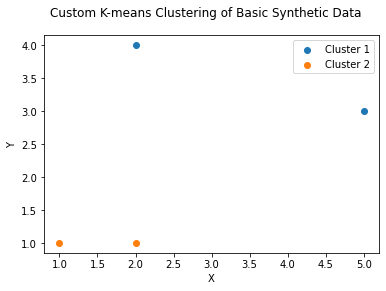

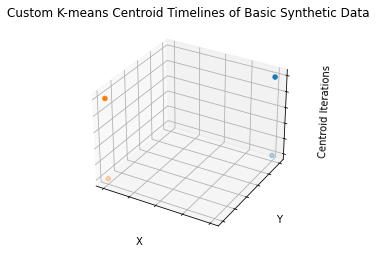

In [6]:
data = [[1, 1], [2, 4], [5, 3], [2, 1]] # create basic synthetic data
results = k_means(data, 2) # run k-means
centroids_timeline = results[0]
clusters = results[1]
# setup graph
fig = plt.figure() # create graph
fig.suptitle('Custom K-means Clustering of Basic Synthetic Data') # set title 
# set axis labels 
plt.xlabel('X')
plt.ylabel('Y')
plot_clusters(clusters) # plot clusters
# create 3D graph
fig_3D = plt.figure() # create graph
ax = fig_3D.add_subplot(111, projection='3d')
ax.title.set_text('Custom K-means Centroid Timelines of Basic Synthetic Data')
plot_centroids_over_time(centroids_timeline)
plt.show()

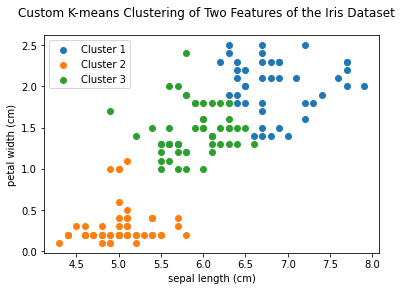

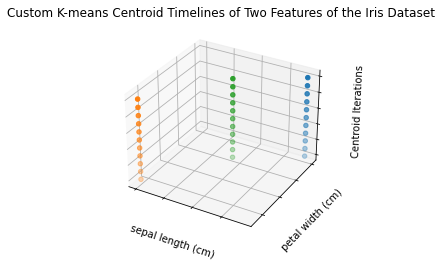

In [7]:
# get dataset 
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

# choose two features to use for clustering
x_feature = 0
y_feature = 3

# format data
pairs = iris.data[:, [x_feature, y_feature]].tolist()

# setup graphs
fig = plt.figure() # create graph
fig.suptitle('Custom K-means Clustering of Two Features of the Iris Dataset') # set title 
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])

results = k_means(pairs, 3) # run k-means
centroids_timeline = results[0]
clusters = results[1]
plot_clusters(clusters) # plot clusters

# create 3D graph
fig_3D = plt.figure()
ax = fig_3D.add_subplot(111, projection='3d')
ax.title.set_text('Custom K-means Centroid Timelines of Two Features of the Iris Dataset') # set title 
plot_centroids_over_time(centroids_timeline, iris.feature_names[x_feature], iris.feature_names[y_feature]) # plot centroids over time
plt.show()

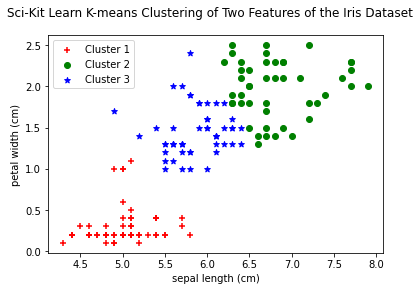

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = iris.data[:, [x_feature, y_feature]].tolist() # format data 

sklearn_kmeans = KMeans(n_clusters=3, init='random') # create sklearn kmeans instance

sklearn_kmeans.fit(data) # fit model to data 

# setup graphs
fig = plt.figure() # create graph
fig.suptitle('Sci-Kit Learn K-means Clustering of Two Features of the Iris Dataset') # set title 
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])

# get clusters from algorithm and scatter
cluster_one = []
cluster_two = []
cluster_three = []
for i in range(len(data)):
    if sklearn_kmeans.labels_[i] == 0:
        cluster_one.append(data[i])
    elif sklearn_kmeans.labels_[i] == 1:
        cluster_two.append(data[i])
    else:
        cluster_three.append(data[i])

c1 = plt.scatter([x[0] for x in cluster_one], [x[1] for x in cluster_one], c='r', marker='+')
c2 = plt.scatter([x[0] for x in cluster_two], [x[1] for x in cluster_two], c='g', marker='o')
c3 = plt.scatter([x[0] for x in cluster_three], [x[1] for x in cluster_three], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [9]:
# helper functions for DBSCAN

def find_neighbors(data, point, eps):
    """Finds the neighbors of a datapoint.

    Parameters
    ----------
    data : array
        2D array of x and y coordinates.
    point : array
        The x and y position of the point your finding neighbors for.
    eps : float
        Minimum distance to be considered a neighbor.
    
    Returns
    -------
    neighbors : array
        2D array of x and y coordinates.
    """
    neighbors = []
    for potential_neighbor in data:
        if distance(point, potential_neighbor) <= eps:
            neighbors.append(potential_neighbor)
    return neighbors
def check_noise(data):
    """Checks if a datapoint has been labeled as noise.

    Parameters 
    ----------
    data : array
        The x and y position of the point you're evauluating. 
    
    Returns
    -------
    is_noise : bool
        Whether or not a datapoint has been labeled as noise.
    """
    if len(data) < 3:
        return False
    else: 
        return data[2] is 'NOISE'

In [10]:
def DBSCAN(data, eps, min_pts):
    """Implementation of DBSCAN clustering algorithm in python.

    Only works for datasets with two features.

    Parameters
    ----------
    datapoints : array
        2D array of x and y coordinates.
    eps : float
        Minimum distance to be considered a neighbor.
    min_pts : int 
        Minimum number of points.

    Returns
    -------
    results : array
        4D array containing 3D array of clusters and 2D array of datapoints labeled as noise.
    """

    clusters = []
    noise = []
    i = -1 # we want first cluster to have index of 0 
    for point in data: # process all datapoints
        if len(point) is 3: # don't process if already labeled (processed)
            continue
        # find neighbors of point
        neighbors = find_neighbors(data, point, eps)
        # density check (if core point or no)
        if len(neighbors) < min_pts:
            point.append('NOISE')
            continue
        i += 1 # increment cluster index
        point.append(i) # label core point with cluster index
        # the "seed set" originally are all the point's neighbors, excluding the point itself
        seed_set = neighbors 
        seed_set.remove(point)
        for neighbor in seed_set: # process and find all the points in the cluster
            if check_noise(neighbor): # border point of cluster
                neighbor[2] = i
                continue
            elif len(neighbor) is 3: # already processed point
                continue
            neighbor.append(i) # label neighbor with cluster index
            new_neighbors = find_neighbors(data, neighbor, eps) # find new neighbors 
            if len(new_neighbors) >= min_pts: # density check (if core point or no)
                seed_set += new_neighbors
        seed_set.append(point) # add back the original point to the seed set (really now the cluster)
        clusters.append(seed_set) # add fully formed cluster to array of clusters 
    # after everything has been processed
    for point in data: 
        if check_noise(point):
            # add point to noise array if it has been labeled as noise
            # when graphing, the noise acts as a cluster
            noise.append(point)
    return [clusters, noise]

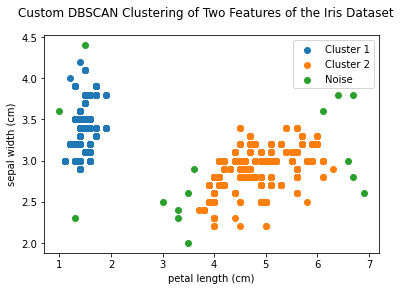

In [11]:
# format iris data
x_feature = 2
y_feature = 1
pairs = iris.data[:, [x_feature, y_feature]].tolist()

# run DBSCAN
iris_dbscan_results = DBSCAN(pairs, .3, 5)
clusters = iris_dbscan_results[0]
noise = iris_dbscan_results[1]
to_graph = clusters
to_graph.append(noise) # noise functions as a cluster when graphing

# plot clustering results
fig = plt.figure() # create graph
fig.suptitle('Custom DBSCAN Clustering of Two Features of the Iris Dataset') # set title 
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])
plot_clusters(to_graph, True)
plt.show()

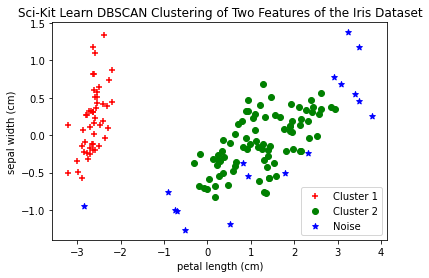

In [12]:
# https://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/

# run sci-kit learn's DBSCAN on iris data for comparison 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(iris.data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('Sci-Kit Learn DBSCAN Clustering of Two Features of the Iris Dataset')
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])
plt.show()

In [13]:
# helper functions for agglomerative hierarchical clustering
def cluster_avg(cluster):
    """Calculates the average of a cluster.

    Parameters 
    ----------
    cluster : array
        Either dendrogram or 1D array containing x & y cord of a singular point.

    Returns 
    -------
    avg : array
        The average x and y coordinate.
    """
    if isinstance(cluster[0], list):
        cluster = convert_flattened_to_pairs(recursive_dendrogram_flattener(cluster)) # get cluster (really dendrogram) to right format
        return [sum([x[0] for x in cluster])/len(cluster), sum([x[1] for x in cluster])/len(cluster)]
    else:
        return cluster

def combine_clusters(cluster1, cluster2):
    """Combines two clusters.

    Parameters
    ----------
    cluster1 : array
        Either 2D array of datapoints, or 1D array w/ x & y of a singular point.
    cluster2 : array
        Either 2D array of datapoints, or 1D array w/ x & y of a singular point.

    Returns
    -------
    combined_cluster : array
        2D array of datapoints.
    """
    return [cluster1, cluster2]

def recursive_dendrogram_flattener(dendrogram):
    """Flattens any array into 1D recursively.

    First step in two step process of getting all the datapoints in a unknown-D array.

    Parameters
    ----------
    dendrogram : array
        ND array for flattening.
    
    Returns
    -------
    flattened : array
        1D array.
    """
    flattened = []
    for val in dendrogram:
        if isinstance(val, list):
            one_d_arr = recursive_dendrogram_flattener(val)
            for el in one_d_arr:
                flattened.append(el)
        else:
            flattened.append(val)
    return flattened

def convert_flattened_to_pairs(flattened):
    """Converts a flattened (1D array) into 2D array, where each element is a x-y pair.

    Second step in two step process of getting all the datapoints in a unknown-D array.

    Parameters
    ----------
    flattened: array
        1D array where data is of format [x1, y1, x2, y2, x3, y3, ... , xn, yn]

    Returns 
    -------
    pairs : array
        2D array where data is of format [[x1, y1], [x2, y2], [x3, y3], ... [xn, yn]]
    """
    pairs = []
    for i in range(len(flattened)):
        if i % 2 == 0: # if even
            pairs.append([flattened[i], flattened[i+1]])
    return pairs

In [14]:
def agglomerative_hierarchical_clustering(datapoints):
    """Implementation of agglomerative hierarchical clustering algorithm in python.

    Only works for datasets with two features.

    Parameters
    ----------
    datapoints : array
        2D array of x and y coordinates.

    Returns
    -------
    dendrogram : array
        3D array of the hierarchy of clusters.
    """

    proximity_matrix = [[[] for _ in range(len(datapoints))] for __ in range(len(datapoints))]

    # generate initial proximity matrix
    i = 0
    for point1 in datapoints:
        i2 = 0
        for point2 in datapoints:
            if not proximity_matrix[i2][i]: # distance hasn't been calculated yet
                if i == i2: # point1 is point2
                    proximity_matrix[i][i2] = proximity_matrix[i2][i] = 0
                else:
                    proximity_matrix[i][i2] = proximity_matrix[i2][i] = distance(point1, point2)
            i2 += 1
        i += 1

    finished = False # when algo is done (created one cluster)
    while not finished:
        # figure out what pair of two points/clusters are closest 
        smallest_distance = -1 # initalize with impossible value
        smallest_distance_index = [] # the index of the element in the proximity matrix has the smallest distance
        i = 0
        for distance_arr in proximity_matrix:
            i2 = 0
            for dist in distance_arr:
                if i != i2: # the datapoints can't be the same datapoint 
                    if smallest_distance is -1 or dist < smallest_distance: 
                        smallest_distance = dist
                        # because we will be using the pop function later which messes with the indexes
                        if i < i2:
                            smallest_distance_index = [i, i2]
                        else:
                            smallest_distance_index = [i2, i]
                i2 += 1
            i += 1

        # combine the two datapoints into a dendrogram, set the first datapoint to the dendrogram 
        # the two datapoints are either regular datapoints (1D array w/ x & y cord) or dendogram (cluster w/ any degree of hierarchy)
        datapoints[smallest_distance_index[0]] = combine_clusters(datapoints[smallest_distance_index[0]], datapoints[smallest_distance_index[1]])

        # remove the second datapoint
        datapoints.pop(smallest_distance_index[1])

        # regenerate proximity matrix
        old_proximity_matrix = proximity_matrix
        proximity_matrix = [[[] for _ in range(len(datapoints))] for __ in range(len(datapoints))]

        i = 0
        for cluster1 in datapoints:
            i2 = 0
            for cluster2 in datapoints:
                if not proximity_matrix[i2][i]:
                    if i == i2:
                        proximity_matrix[i][i2] = proximity_matrix[i2][i] = 0
                    elif i == smallest_distance_index[0] or i2 == smallest_distance_index[0]:
                        # if one of the clusters is the new cluster, you have to calculate the distance 
                        proximity_matrix[i][i2] = proximity_matrix[i2][i] = distance(cluster_avg(cluster1), cluster_avg(cluster2))
                    else:
                        # determine the location of the proximity in the old proximity matrix
                        a = i
                        b = i2
                        # smallest_distance_index[1] is the index where an element got popped out 
                        if a >= smallest_distance_index[1]: 
                            a += 1
                        if b >= smallest_distance_index[1]:
                            b += 1
                        proximity_matrix[i][i2] = proximity_matrix[i2][i] = old_proximity_matrix[a][b]
                i2 += 1
            i += 1
        # we've successfully clustered all the clusters into one cluster
        if len(datapoints) == 1:
            finished = True
    return datapoints[0]

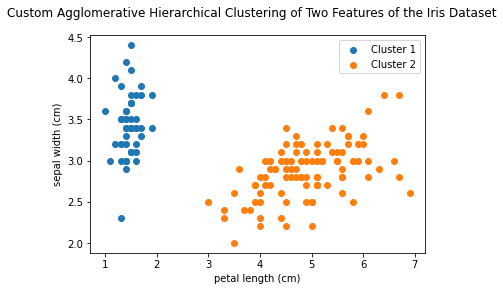

In [15]:
pairs = iris.data[:, [x_feature, y_feature]].tolist() # format data 
dendrogram = agglomerative_hierarchical_clustering(pairs) # run algo 
# get results into right format (dendrogram -> 2D array of cords) for plotting
cluster1 = convert_flattened_to_pairs(recursive_dendrogram_flattener(dendrogram[0])) 
cluster2 = convert_flattened_to_pairs(recursive_dendrogram_flattener(dendrogram[1]))
# plot clustering results
fig = plt.figure() # create graph
fig.suptitle('Custom Agglomerative Hierarchical Clustering of Two Features of the Iris Dataset') # set title 
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])
plot_clusters([cluster1, cluster2])

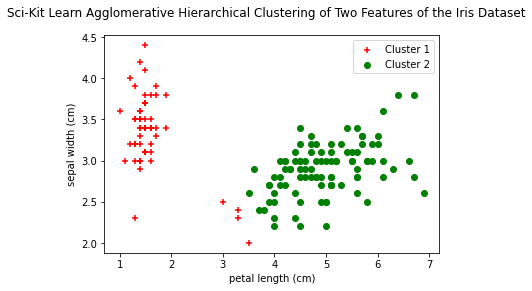

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
pairs = iris.data[:, [x_feature, y_feature]].tolist() # format data 
sklearn_agglomerative_clustering = AgglomerativeClustering() # create model
sklearn_agglomerative_clustering.fit(pairs) # fit model to data

# setup graphs
fig = plt.figure() # create graph
fig.suptitle('Sci-Kit Learn Agglomerative Hierarchical Clustering of Two Features of the Iris Dataset') # set title 
# set axis labels 
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])

# get clusters from algorithm and scatter
cluster_one = []
cluster_two = []
for i in range(len(pairs)):
    if sklearn_kmeans.labels_[i] == 0:
        cluster_one.append(pairs[i])
    else:
        cluster_two.append(pairs[i])

c1 = plt.scatter([x[0] for x in cluster_one], [x[1] for x in cluster_one], c='r', marker='+')
c2 = plt.scatter([x[0] for x in cluster_two], [x[1] for x in cluster_two], c='g', marker='o')
plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.show()